In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
devbatrax_fracture_detection_using_x_ray_images_path = kagglehub.dataset_download('devbatrax/fracture-detection-using-x-ray-images')

print('Data source import complete.')


Data source import complete.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, MobileNet, DenseNet169
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def create_resnet_model(input_shape):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze the base model

    resnet_model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return resnet_model


In [ ]:
def create_mobilenet_model(input_shape):
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze the base model

    mobilenet_model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return mobilenet_model


In [ ]:
def create_densenet_model(input_shape):
    base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze the base model

    densenet_model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return densenet_model


In [ ]:
def train_and_evaluate(model, X_train, X_test, Y_train, Y_test, epochs=10):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, Y_train,epochs=epochs, validation_data=(X_test, Y_test))
    return history

In [ ]:
def print_evaluation_results(model, X_test, Y_test):
    val_loss, val_accuracy = model.evaluate(X_test, Y_test)
    print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

In [ ]:
import os
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical

# Define the path to the dataset folder
dataset_path = "/kaggle/input/fracture-detection-using-x-ray-images/data/train"


# Define the list of label folders in the dataset folder
label_folders = ["fractured", "not fractured"]

# Define the size of the input images
img_height = 224
img_width = 224

# Define an empty list to store the images and their labels
data = []
labels = []

# Loop over the label folders in the dataset folder
for label_folder in label_folders:
    # Define the path to the label folder
    label_path = os.path.join(dataset_path, label_folder)
    # Loop over the images in the label folder
    for img_name in os.listdir(label_path):
        # Define the path to the image
        img_path = os.path.join(label_path, img_name)
        # Load the image and resize it to the desired size
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_height, img_width))
        # Append the image and its label to the data and labels lists
        data.append(img)
        labels.append(label_folder)

# Convert the data and labels lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Convert the labels to one-hot encoded vectors
# labels = to_categorical(labels)

# Print the shape of the data and labels arrays
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

Data shape: (8863, 224, 224, 3)
Labels shape: (8863,)


In [ ]:
import numpy as np


# Get the unique string values
unique_values = np.unique(labels)

# Create a mapping dictionary
mapping = {value: index for index, value in enumerate(unique_values)}

# Map the string values to numbers
mapped_arr = np.array([mapping[value] for value in labels])

print("Original array:", labels)
print("Mapped array:", mapped_arr)
print("Mapping dictionary:", mapping)


Original array: ['fractured' 'fractured' 'fractured' ... 'not fractured' 'not fractured'
 'not fractured']
Mapped array: [0 0 0 ... 1 1 1]
Mapping dictionary: {np.str_('fractured'): 0, np.str_('not fractured'): 1}


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data,mapped_arr, test_size = 0.2,random_state=0,shuffle=True,stratify=mapped_arr)

In [ ]:
resnet_model = create_resnet_model((img_height, img_width, 3))
mobilenet_model = create_mobilenet_model((img_height, img_width, 3))
densenet_model = create_densenet_model((img_height, img_width, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
resnet_history = train_and_evaluate(resnet_model, X_train, X_test, Y_train, Y_test, epochs=10)
print_evaluation_results(resnet_model, X_test, Y_test)

mobilenet_history = train_and_evaluate(mobilenet_model, X_train, X_test, Y_train, Y_test, epochs=10)
print_evaluation_results(mobilenet_model, X_test, Y_test)

densenet_history = train_and_evaluate(densenet_model, X_train, X_test, Y_train, Y_test, epochs=10)
print_evaluation_results(densenet_model, X_test, Y_test)

Epoch 1/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 46s 150ms/step - accuracy: 0.6889 - loss: 0.6644 - val_accuracy: 0.9126 - val_loss: 0.2537
Epoch 2/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 23s 98ms/step - accuracy: 0.9249 - loss: 0.2207 - val_accuracy: 0.9385 - val_loss: 0.1830
Epoch 3/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 42s 103ms/step - accuracy: 0.9643 - loss: 0.1179 - val_accuracy: 0.9492 - val_loss: 0.1387
Epoch 4/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 41s 104ms/step - accuracy: 0.9771 - loss: 0.0769 - val_accuracy: 0.9650 - val_loss: 0.0998
Epoch 5/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 41s 103ms/step - accuracy: 0.9853 - loss: 0.0541 - val_accuracy: 0.9876 - val_loss: 0.0476
Epoch 6/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 24s 107ms/step - accuracy: 0.9979 - loss: 0.0231 - val_accuracy: 0.9865 - val_loss: 0.0431
Epoch 7/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 23s 104ms/step - accuracy: 0.9988 - loss: 0.0165 - val_accuracy: 0.9893 - val_loss: 0.0382
Epoch 8/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 40s 101ms/step - accuracy: 0.9985 - loss: 0.

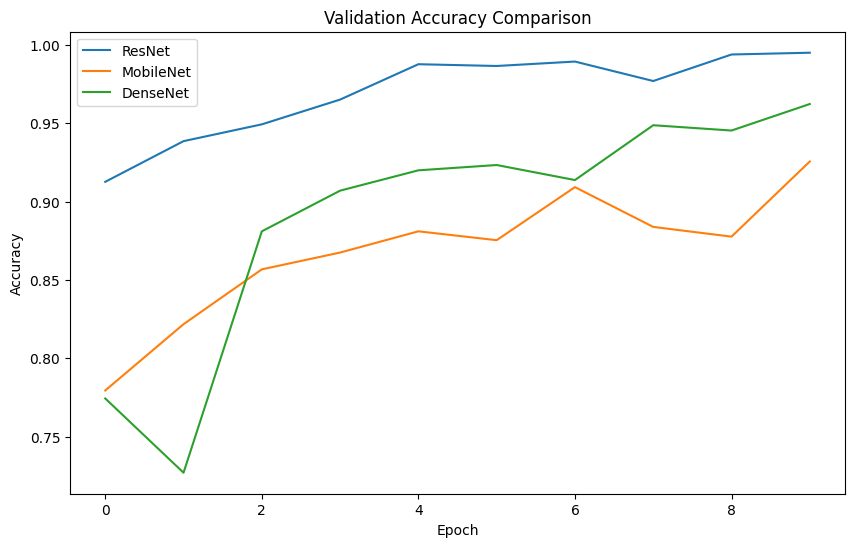

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy_comparison(models, histories):
    plt.figure(figsize=(10, 6))

    for model, history in zip(models, histories):
        plt.plot(history.history['val_accuracy'], label=model)

    plt.title('Validation Accuracy Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

models = ['ResNet', 'MobileNet', 'DenseNet']
histories = [resnet_history, mobilenet_history, densenet_history]

plot_accuracy_comparison(models, histories)

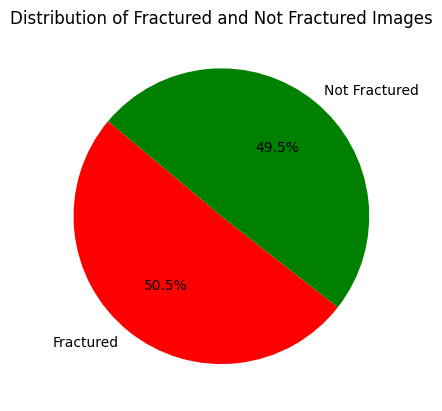

In [ ]:
import matplotlib.pyplot as plt

fractured_count = 4481
not_fractured_count = 4384

labels = ['Fractured', 'Not Fractured']
sizes = [fractured_count, not_fractured_count]
colors = ['red', 'green']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Fractured and Not Fractured Images')
plt.show()

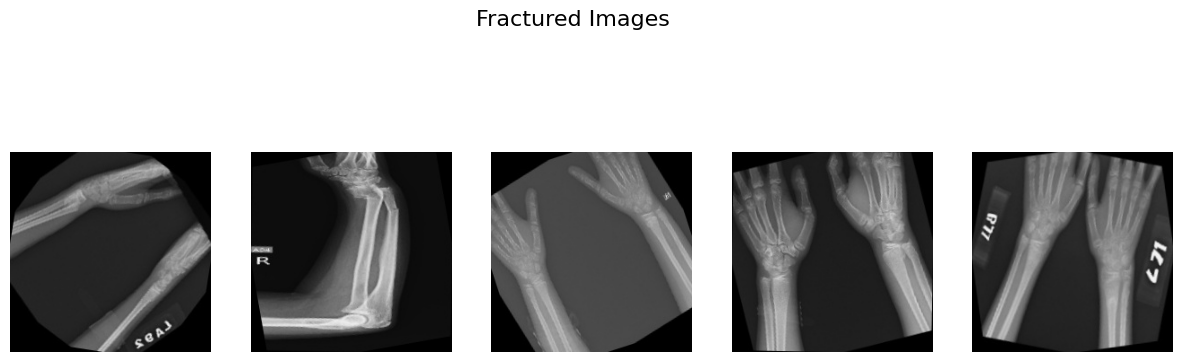

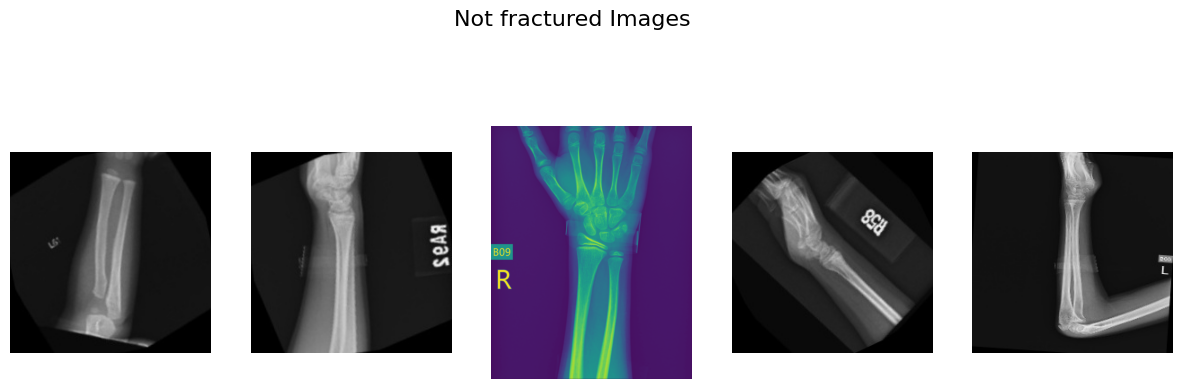

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from random import sample

train_dir = '/kaggle/input/fracture-detection-using-x-ray-images/data/train'

def plot_images(image_dir, category, num_images=5):
    plt.figure(figsize=(15, 5))
    plt.suptitle(f'{category.capitalize()} Images', fontsize=16)

    image_files = [os.path.join(image_dir, category, file) for file in os.listdir(os.path.join(image_dir, category))]
    selected_images = sample(image_files, num_images)

    for i, img_path in enumerate(selected_images, 1):
        plt.subplot(1, num_images, i)
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.axis('off')

    plt.show()

plot_images(train_dir, 'fractured', num_images=5)
plot_images(train_dir, 'not fractured', num_images=5)

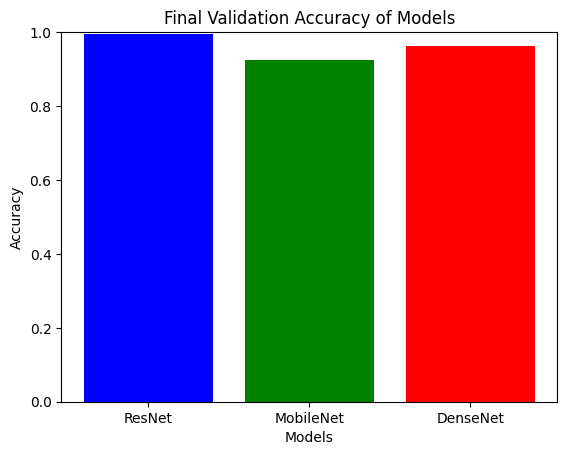

In [ ]:
import matplotlib.pyplot as plt

resnet_val_accuracy = resnet_history.history['val_accuracy']
mobilenet_val_accuracy = mobilenet_history.history['val_accuracy']
densenet_val_accuracy = densenet_history.history['val_accuracy']

final_accuracies = [resnet_val_accuracy[-1], mobilenet_val_accuracy[-1], densenet_val_accuracy[-1]]
models = ['ResNet', 'MobileNet', 'DenseNet']

plt.bar(models, final_accuracies, color=['blue', 'green', 'red'])
plt.title('Final Validation Accuracy of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

In [ ]:
resnet_model.save('final_resnet.keras')

56/56 ━━━━━━━━━━━━━━━━━━━━ 14s 254ms/step


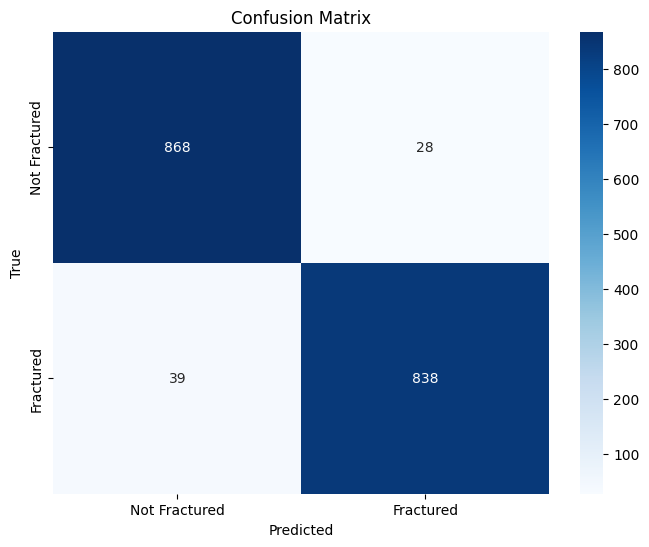

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(model, X_test,Y_test):
    y_pred = model.predict(X_test,)
    y_pred_binary = (y_pred > 0.5).astype(int)
    y_true = Y_test

    conf_matrix = confusion_matrix(y_true, y_pred_binary)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fractured', 'Fractured'], yticklabels=['Not Fractured', 'Fractured'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(densenet_model, X_test,Y_test)